In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lendo o arquivo
df = pd.read_csv('weatherHistory.csv')

In [4]:
# Retirando os nulos
df = df[df['Precip Type'].isna() == False]

### 🔵 Atividades

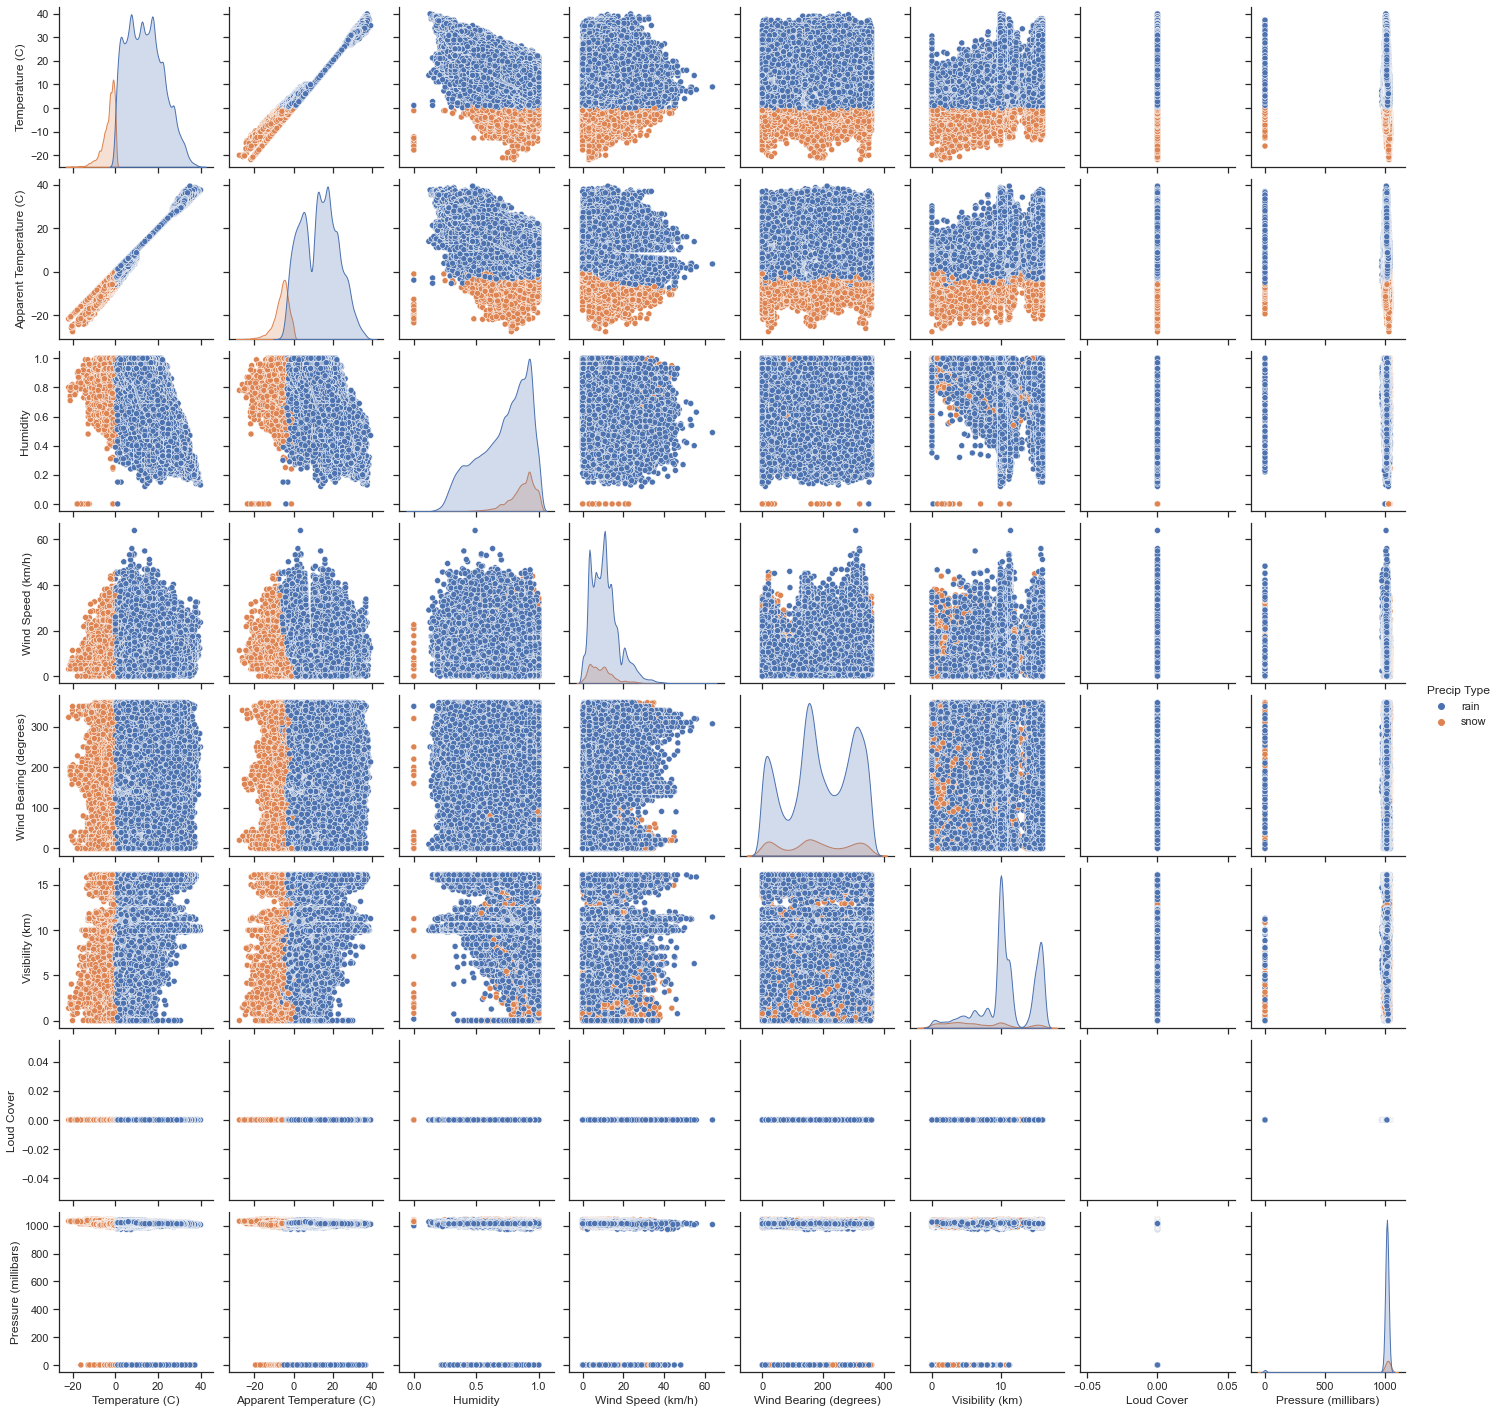

In [5]:
sns.set(style = 'ticks')
sns.pairplot(df, hue = 'Precip Type')
plt.show()

### 1) Utilize o K-means para separar os dados em grupos distintos, desconsiderando o tipo de precipitação.

#### 🔵 Agrupar os dados utilizando o K-Means

In [6]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters = 3)
k_means.fit(df[[u'Temperature (C)', u'Apparent Temperature (C)', 
                u'Humidity', u'Wind Speed (km/h)', u'Wind Bearing (degrees)', 
                u'Visibility (km)', u'Pressure (millibars)']])

KMeans(n_clusters=3)

In [7]:
print(k_means.cluster_centers_)
df.groupby('Precip Type')\
    [[u'Temperature (C)', u'Apparent Temperature (C)', 
      u'Humidity', u'Wind Speed (km/h)', u'Wind Bearing (degrees)', 
      u'Visibility (km)', u'Pressure (millibars)']].mean()

[[1.23303350e+01 1.13222581e+01 7.32465550e-01 1.13180763e+01
  2.87539220e+02 1.06501972e+01 1.01636679e+03]
 [1.16452399e+01 1.05201252e+01 7.36953506e-01 1.03256130e+01
  1.03458470e+02 1.01852468e+01 1.01716568e+03]
 [1.07057928e+01 9.13331177e+00 7.30054348e-01 1.27563000e+01
  1.93510093e+02 7.79356250e+00 4.54747351e-13]]


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,,,,,,,
rain,13.852989,13.013425,0.718699,10.971219,189.123170,10.830711,1002.764548
snow,-3.270885,-6.249847,0.863263,9.481998,174.754294,6.636570,1006.216970


In [8]:
def trocarTipo(x):
    if str(x) == 'rain':
        return 0
    else:
        return 1

df['Precip Type'] = df['Precip Type'].apply(trocarTipo)

### 2) Veja se é possível associar cada grupo gerado pelo K-means a um tipo de precipitação diferente, olhando para o tipo de precipitação real.

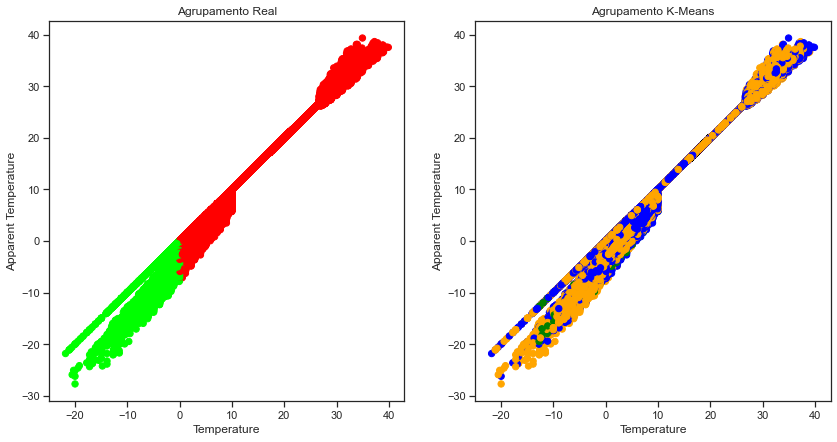

In [9]:
# Visualizar e comparar os resultados do agrupamento
# Tamanho do gráfico
plt.figure(figsize = (14, 7))

# Lista de cores
colormap_real = np.array(['red', 'lime', 'black'])
colormap_group = np.array(['blue', 'orange', 'green'])

# Agrupamentos Originais/Reais
plt.subplot(1, 2, 1)
plt.scatter(x = df[u'Temperature (C)'], y = df[u'Apparent Temperature (C)'],\
            c = colormap_real[df[u'Precip Type']], s = 40)    
plt.title('Agrupamento Real')
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature')

# Plot the models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x = df[u'Temperature (C)'], y = df[u'Apparent Temperature (C)'],\
            c = colormap_group[k_means.labels_], s = 40)
plt.title('Agrupamento K-Means')
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature')

plt.show()

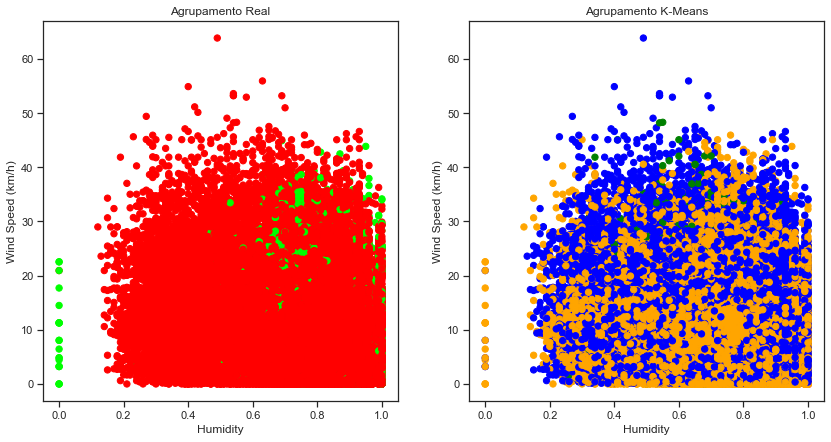

In [12]:
# Visualizar e comparar os resultados do agrupamento
# Tamanho do gráfico
plt.figure(figsize = (14, 7))

# Lista de cores
colormap_real = np.array(['red', 'lime', 'black'])
colormap_group = np.array(['blue', 'orange', 'green'])

# Agrupamentos Originais/Reais
plt.subplot(1, 2, 1)
plt.scatter(x = df[u'Humidity'], y = df[u'Wind Speed (km/h)'],\
           c = colormap_real[df[u'Precip Type']], s = 40)   
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')

# Plot the models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x = df[u'Humidity'], y = df[u'Wind Speed (km/h)'],\
            c = colormap_group[k_means.labels_], s = 40)
plt.title('Agrupamento K-Means')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')

plt.show()

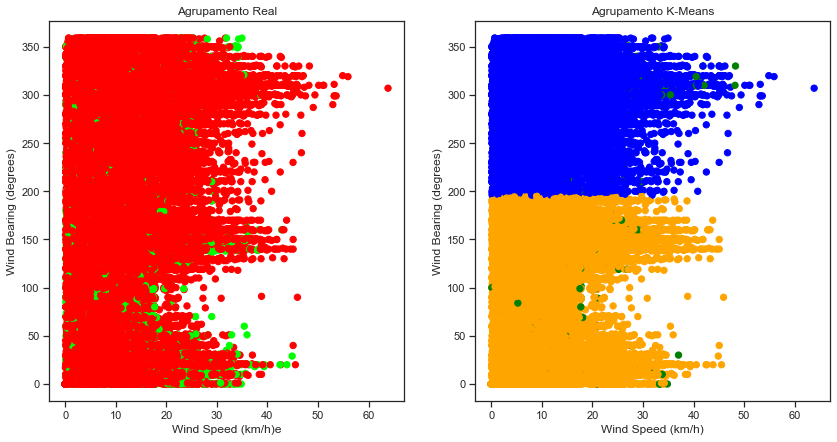

In [13]:
# Visualizar e comparar os resultados do agrupamento
# Tamanho do gráfico
plt.figure(figsize = (14, 7))

# Lista de cores
colormap_real = np.array(['red', 'lime', 'black'])
colormap_group = np.array(['blue', 'orange', 'green'])

# Agrupamentos Originais/Reais
plt.subplot(1, 2, 1)
plt.scatter(x = df[u'Wind Speed (km/h)'], y = df[u'Wind Bearing (degrees)'],\
           c = colormap_real[df[u'Precip Type']], s = 40)   
plt.title('Agrupamento Real')
plt.xlabel('Wind Speed (km/h)e')
plt.ylabel('Wind Bearing (degrees)')

# Plot the models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x = df[u'Wind Speed (km/h)'], y = df[u'Wind Bearing (degrees)'],\
            c = colormap_group[k_means.labels_], s = 40)
plt.title('Agrupamento K-Means')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Wind Bearing (degrees)')

plt.show()

### 3) Faça testes com diferentes atributos para verificar se existem sub-conjuntos de atributos mais adequados para agrupar esses dados.

### Utilize o cálculo da silhueta para verificar a qualidade dos grupos obtidos.
https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient 

**The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.** <br />
from sklearn import metrics <br />
from sklearn.metrics import pairwise_distances <br />
from sklearn import datasets <br />
X, y = datasets.load_iris(return_X_y=True) <br />

**In normal usage, the Silhouette Coefficient is applied to the results of a cluster analysis.** <br />
import numpy as np <br />
from sklearn.cluster import KMeans <br />
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X) <br />
labels = kmeans_model.labels_ <br />
metrics.silhouette_score(X, labels, metric='euclidean') <br />
0.55...

### É possível observar que o coeficiente de silhueta está associado a um melhor agrupamento, ao se comparar com os dados reais?

In [14]:
# Retirando Colunas que não podem ser avaliadas
df = df.drop(columns=['Formatted Date', 'Summary', 'Daily Summary', 'Loud Cover'])

In [17]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

In [18]:
labels = k_means.labels_
metrics.silhouette_score(df, labels, metric='euclidean')

0.5863507024746185